In [6]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from script.plotDisplayLinear import plotDisplay


In [7]:
linear_model = ctypes.CDLL("modele/linear/target/release/liblinear_classification.so")


linear_model.LM_init.argtypes = [
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_double,
    ctypes.c_char
]
linear_model.LM_init.restype = ctypes.POINTER(ctypes.c_void_p)

linear_model.LM_free.argtypes = [ctypes.POINTER(ctypes.c_void_p)]

linear_model.LM_train.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    ctypes.c_size_t
]

linear_model.LM_predict.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

## Linear simple

vector x : [[1.0], [1.0], [2.0]]
vector y : [1.0, -1.0, -1.0]
Training completed
---------------
[-0.05273889 -0.05273889 -0.99979935]
---------------
vector x : [1.0, 1.0, 2.0]
samples : 3
features : 1
vector x converted : [[1.0], [1.0], [2.0]]


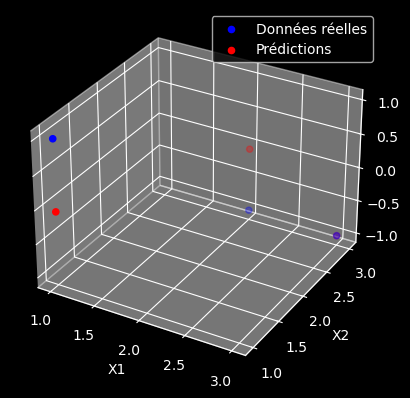

<Figure size 640x480 with 0 Axes>

In [8]:
# XOR test
learning_rate = 0.05
weights = np.array([0.1, -0.4, 0.6, -0.24], dtype=np.float64, order='C')
bias = 0.2
epochs = 100000
activation = b't'
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

x_train = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
], dtype=np.float64)
x_train_flatten = x_train.flatten()
y_train = np.array([
    1.0,
    -1.0,
    -1.0
], dtype=np.float64)
n_samples, n_features = 3, 1

linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

predictions = np.zeros(n_samples, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples,
    n_features,
    predictions
)

print("---------------")
print(predictions)
print("---------------")

linear_model.LM_free(model)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='blue', label='Données réelles')
ax.scatter(x_train[:, 0], x_train[:, 1], predictions, color='red', label='Prédictions')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.legend()
plt.show()
plt.clf()

# Xor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


vector x : [[1.0], [0.0], [0.0], [1.0]]
vector y : [1.0, 1.0, -1.0, -1.0]
Training completed
---------------
[-0.05258049 -0.07811046 -0.07811046 -0.05258049]
---------------
vector x : [1.0, 0.0, 0.0, 1.0]
samples : 4
features : 1
vector x converted : [[1.0], [0.0], [0.0], [1.0]]


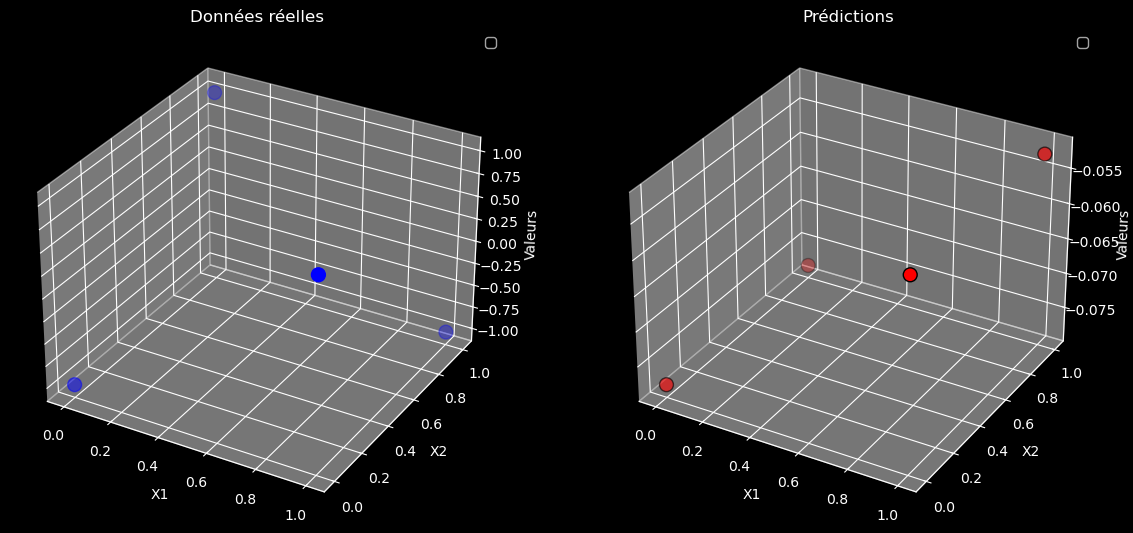

In [9]:
# XOR test
learning_rate = 0.05
weights = np.array([0.1, -0.4, 0.6, -0.24], dtype=np.float64, order='C')
bias = 0.2
epochs = 100000
activation = b't'
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

x_train = np.array([
    [1, 0], [0, 1], [0, 0], [1, 1]
], dtype=np.float64)
x_train_flatten = x_train.flatten()
y_train = np.array([
    1.0,
    1.0,
    -1.0,
    -1.0
], dtype=np.float64)
n_samples, n_features = 4, 1
# n_samples, n_features = x_train.shape[0], x_train.shape[1]

linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

predictions = np.zeros(n_samples, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples,
    n_features,
    predictions
)

print("---------------")
print(predictions)
print("---------------")

linear_model.LM_free(model)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='blue', label='Données réelles')
# ax.scatter(x_train[:, 0], x_train[:, 1], predictions, color='red', label='Prédictions')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# plt.legend()
# plt.show()
# plt.clf()

fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_train[:, 0], x_train[:, 1], y_train,s=100, color='blue')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Valeurs')
ax1.set_title('Données réelles')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_train[:, 0], x_train[:, 1], predictions, color='red', edgecolor='k', s=100, marker='o')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Valeurs')
ax2.set_title('Prédictions')
ax2.legend()

plt.show()


## Linear Multiple

vector x : [[2.787577816212255, 2.4253287955920575], [2.1470437625500867, 2.691403347435364], [1.8952233383068915, 1.6557811326857634], [1.4047543228692168, 1.7794023882972925], [2.0260500289682, 2.034221621107064], [1.8247245336242348, 1.190126144321947], [1.889459281756253, 1.0460540200347892], [2.142674861616975, 2.0421079920649117], [1.1263509893180785, 1.674845370217075], [2.090258744115245, 2.2335783719462685], [1.738977283541125, 1.3230659495011057], [1.1543306497920902, 1.2657806784598602], [2.0249218195283687, 2.0442138806951986], [1.6400854040034214, 1.79657094742657], [2.0141013252943867, 2.542780252406688], [1.3605958890886043, 1.6649699309986916], [2.510036301278393, 2.394284632241666], [2.3318835663506046, 2.467598946691569], [1.8178994593025484, 1.382168979227479], [1.4500696383676086, 1.742415518440282], [1.6873906669208285, 1.27406053828647], [1.5707715095174781, 1.3741602350601605], [1.4418186441657717, 1.7446486821676999], [2.6435876584957816, 2.455615817425034], [1.

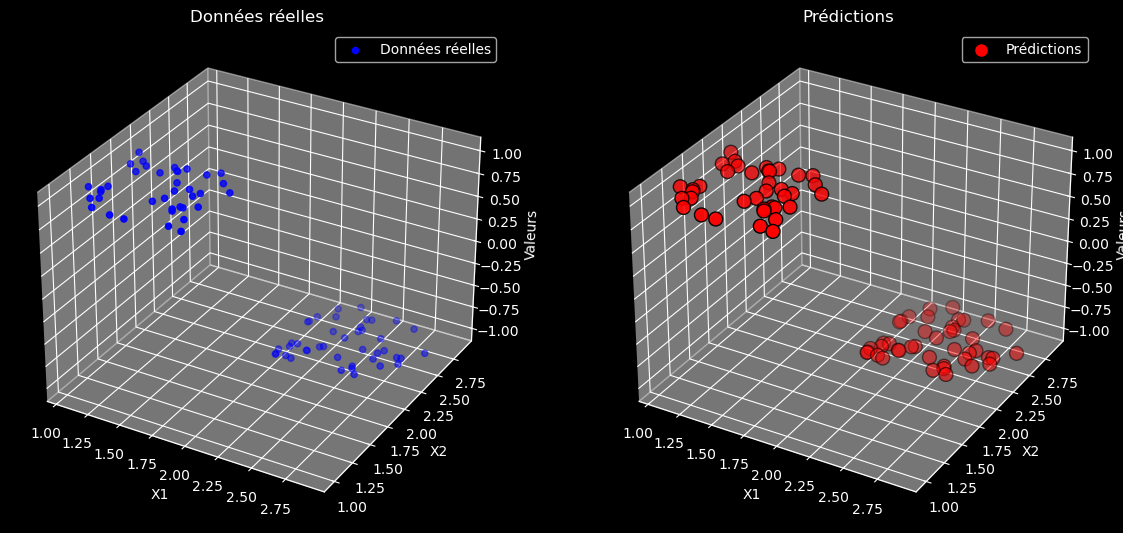

Train Error: 2.1655505075694906e-05
Validation Error: 2.102131047004014e-07


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

learning_rate = 0.1
weights = np.array([0.1, -0.4, 0.6, -0.24], dtype=np.float64, order='C')
bias = 0.4
epochs = 10000
activation = b't'
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

x_train = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
y_train = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0]).flatten()

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

X_train_flatten = X_train.flatten()
X_val_flatten = X_val.flatten()

n_samples, n_features = X_train.shape[0], X_train.shape[1]

linear_model.LM_train(model, X_train_flatten, y_train, n_samples, n_features, epochs)

predictions_train = np.zeros(X_train.shape[0], dtype=np.float64)
predictions_val = np.zeros(X_val.shape[0], dtype=np.float64)

linear_model.LM_predict(model, X_train_flatten, X_train.shape[0], n_features, predictions_train)
linear_model.LM_predict(model, X_val_flatten, X_val.shape[0], n_features, predictions_val)

train_error = np.mean((y_train - predictions_train) ** 2)
val_error = np.mean((y_val - predictions_val) ** 2)

# Visualisation
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Données réelles')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Valeurs')
ax1.set_title('Données réelles')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_train[:, 0], X_train[:, 1], predictions_train, color='red', edgecolor='k', marker='o', s=100, label='Prédictions')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Valeurs')
ax2.set_title('Prédictions')
ax2.legend()

plt.show()

linear_model.LM_free(model)

print(f"Train Error: {train_error}")
print(f"Validation Error: {val_error}")

# Linear multi class

vector x : [[-0.8144230305955469, 0.9710828779671064], [-0.9952650108566681, -0.19294845598458088], [-0.9016491316230333, 0.6278990335274435], [-0.8592522846850563, 0.6050117563974233], [-0.5036139756910356, 0.9303742056323827], [-0.7074437390273971, -0.2545465444808528], [-0.8874119911864959, -0.022811554138071344], [-0.42306005110277667, 0.8963393897316558], [0.811322923889642, -0.9841054857849874], [-0.25965081699423864, 0.5365232434044624], [0.7192983412730567, -0.47587898660364747], [0.6321471075839971, -0.23157902346124093], [-0.04832203940488089, 0.590990002828067], [0.24984593932740262, 0.6633658249798611], [-0.9696470112977154, -0.18025658773147213], [-0.7452968169826759, 0.294944393591817], [0.176406350797069, 0.8210402263074494], [-0.8936094980817348, -0.025189560677422618], [-0.41590806486932763, 0.9474824915104911], [-0.45977082946754, 0.7809242926533841], [0.012623276962414609, 0.2940007447119337], [-0.3683135645497744, -0.8393091049858987], [0.7474767590664586, 0.7506506

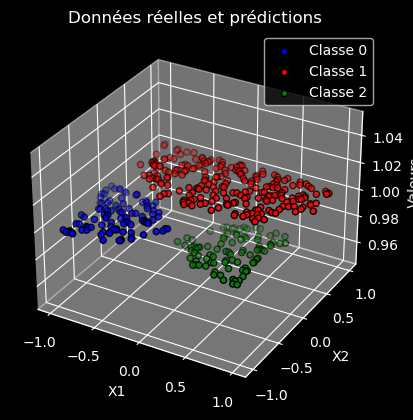

Train Error: 0.9622306584407523
Accuracy: 66.67%


In [11]:
learning_rate = 0.01
weights = np.array([0.1, -0.4, 0.6, -0.24], dtype=np.float64, order='C')
bias = 0.2
epochs = 100000
activation = b't'
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1.0, -1.0, -1.0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1.0, 1.0, -1.0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1.0, -1.0, 1.0] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [-1.0, -1.0, -1.0]for p in X])

x_train = X[[not np.all(arr == [-1.0, -1.0, -1.0]) for arr in Y]]
x_train_flatten = x_train.flatten()
y_train = Y[[not np.all(arr == [-1.0, -1.0, -1.0]) for arr in Y]]
y_train_flatten = y_train.flatten()

n_samples, n_features = x_train.shape[0], x_train.shape[1]

linear_model.LM_train(model, x_train_flatten, y_train_flatten, n_samples, n_features, epochs)

predictions = np.zeros(y_train.shape, dtype=np.float64).flatten()
linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples,
    n_features,
    predictions
)


train_error = np.mean((y_train_flatten - predictions) ** 2)

predictions_final = np.tanh(predictions) 
predictions_binary = np.where(predictions_final > 0, 1, -1)
accuracy = np.mean(predictions_binary == y_train_flatten)

predictions = predictions.reshape(y_train.shape)

plotDisplay(x_train, y_train, predictions, title='Données réelles et prédictions')

linear_model.LM_free(model)

print(f"Train Error: {train_error}")
print(f"Accuracy: {accuracy * 100:.2f}%")
# print(f"Validation Error: {val_error}")


vector x : [[0.8993778221307822, 0.5677237583391732], [0.9726543817657454, -0.07943329770479268], [0.35560011288134685, 0.2532638260424449], [0.9266908599172814, 0.8902347055922473], [-0.5453407203414369, -0.31549744456645623], [-0.5983479528246287, -0.8331452083810353], [-0.9384780738159917, 0.5832816482695042], [-0.9754385306085593, 0.9146663750848918], [0.22642853290136888, 0.9996839350777837], [0.9394746087227468, -0.4353906497345108], [0.07326053729149873, -0.538295094009549], [-0.6535919593315744, -0.6286260798133592], [-0.9466087991656245, -0.05463623363271508], [-0.866692840147089, -0.5324710500066854], [-0.2336221353165442, -0.48134257428760496], [-0.6453596758054623, 0.7583514172522785], [0.4180249620729004, -0.19226713931475037], [0.3834098727650914, 0.8459456469502915], [-0.7764864927772035, -0.1483496882191866], [0.5267639202417336, 0.19485195215530093], [0.10346449541495573, -0.4873379007104526], [0.7233715815065156, 0.328121913336221], [-0.043368325587306744, 0.039047467

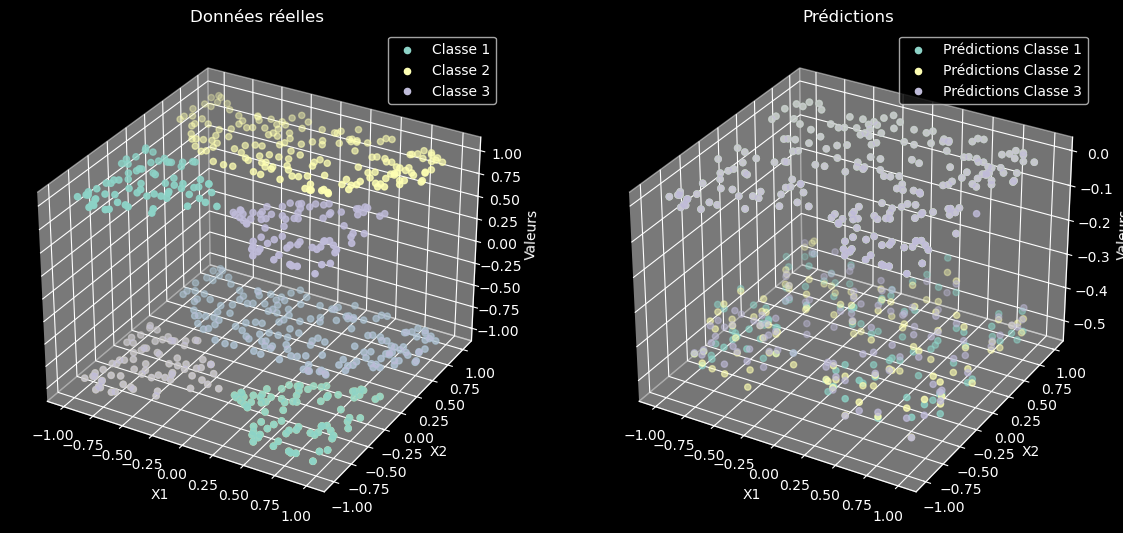

Train Accuracy: 66.67%
Validation Accuracy: 66.67%
Train Error: 0.9659760585297185
Validation Error: 0.9669198652145977


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

# Initialisation du modèle
learning_rate = 0.1
weights = np.array([0.1, -0.4, 0.6, -0.24], dtype=np.float64, order='C')
bias = 2
epochs = 100000
activation = b't'
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

# Génération des données
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1.0, -1.0, -1.0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1.0, 1.0, -1.0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1.0, -1.0, 1.0] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [-1.0, -1.0, -1.0] for p in X])

x_train = X[[not np.all(arr == [-1.0, -1.0, -1.0]) for arr in Y]]
y_train = Y[[not np.all(arr == [-1.0, -1.0, -1.0]) for arr in Y]]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train_flatten = x_train.flatten()
y_train_flatten = y_train.flatten()
x_val_flatten = x_val.flatten()
y_val_flatten = y_val.flatten()

n_samples, n_features = x_train.shape[0], x_train.shape[1]

# Entraînement du modèle
linear_model.LM_train(model, x_train_flatten, y_train_flatten, n_samples, n_features, epochs)

# Prédictions sur l'ensemble d'entraînement
predictions_train = np.zeros_like(y_train_flatten)
linear_model.LM_predict(model, x_train_flatten, x_train.shape[0], n_features, predictions_train)

# Prédictions sur l'ensemble de validation
predictions_val = np.zeros_like(y_val_flatten)
linear_model.LM_predict(model, x_val_flatten, x_val.shape[0], n_features, predictions_val)

# Calcul des erreurs
train_error = np.mean((y_train_flatten - predictions_train) ** 2)
val_error = np.mean((y_val_flatten - predictions_val) ** 2)

# Reshape des prédictions pour correspondre à la forme de y_train
predictions_train = predictions_train.reshape(y_train.shape)
predictions_val = predictions_val.reshape(y_val.shape)

# Calcul de l'accuracy
predictions_train_binary = np.where(np.tanh(predictions_train) > 0, 1, -1)
train_accuracy = np.mean(predictions_train_binary == y_train)

predictions_val_binary = np.where(np.tanh(predictions_val) > 0, 1, -1)
val_accuracy = np.mean(predictions_val_binary == y_val)

# Affichage des graphiques
fig = plt.figure(figsize=(14, 7))

# Premier graphique : Données réelles
ax1 = fig.add_subplot(121, projection='3d')
for i in range(y_train.shape[1]):
    ax1.scatter(x_train[:, 0], x_train[:, 1], y_train[:, i], label=f'Classe {i+1}')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Valeurs')
ax1.set_title('Données réelles')
ax1.legend()

# Deuxième graphique : Prédictions
ax2 = fig.add_subplot(122, projection='3d')
for i in range(predictions_train.shape[1]):
    ax2.scatter(x_train[:, 0], x_train[:, 1], predictions_train[:, i], label=f'Prédictions Classe {i+1}')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Valeurs')
ax2.set_title('Prédictions')
ax2.legend()

plt.show()

linear_model.LM_free(model)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Train Error: {train_error}")
print(f"Validation Error: {val_error}")
